In [96]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

In [97]:
# Simulated Coin Toss
data = np.array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0])

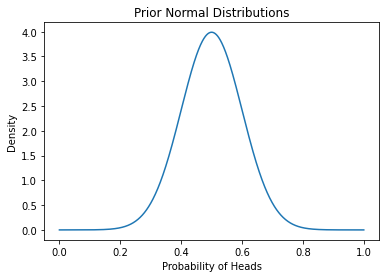

In [98]:
x = np.linspace(0, 1, 1000)
mean = 0.5
std = 0.1
prior_normal = np.array([scipy.stats.norm.pdf(x_val, mean, std) for x_val in x])
plt.plot(x, prior_normal)
plt.xlabel('Probability of Heads')
plt.ylabel('Density')
plt.title('Prior Normal Distributions')
plt.show()

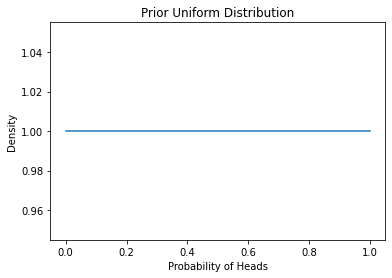

In [99]:
x = np.linspace(0, 1, 1000)

# Calculate the prior uniform distribution over the specified range
prior_uniform = np.array([scipy.stats.uniform.pdf(value, 0, 1) for value in x])

# Plot the prior uniform distribution
plt.plot(x, prior_uniform)
plt.xlabel('Probability of Heads')
plt.ylabel('Density')
plt.title('Prior Uniform Distribution')
plt.show()

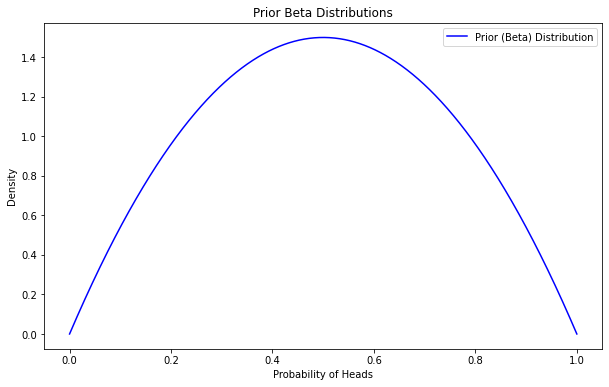

In [100]:
# Define the prior (assumed) distribution - a Beta distribution
prior_alpha = 2  # Beta distribution parameter alpha
prior_beta = 2   # Beta distribution parameter beta

# Generate a range of probabilities for heads (0 to 1) for plotting
probabilities = np.linspace(0, 1, 1000)
prior_beta = scipy.stats.beta.pdf(probabilities, prior_alpha, prior_beta)

# Plot the prior and posterior distributions
plt.figure(figsize=(10, 6))
plt.plot(probabilities, 
         prior_dist,
         label='Prior (Beta) Distribution', color='blue')


plt.xlabel('Probability of Heads')
plt.ylabel('Density')
plt.legend()
plt.title('Prior Beta Distributions')
plt.show()

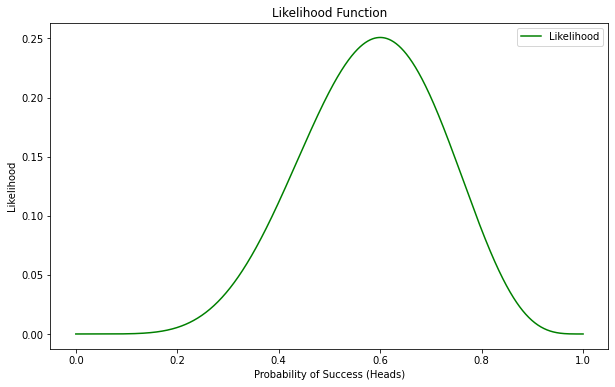

In [101]:
# Likelihood
num_successes = np.sum(data)
num_failures = len(data) - np.sum(data)

# Define the range of probabilities to consider (0 to 1)
probabilities = np.linspace(0, 1, 1000)

# Calculate the likelihood for each probability
likelihood = [stats.binom.pmf(num_successes, len(data), p) for p in probabilities]


# Plot the likelihood function
plt.figure(figsize=(10, 6))
plt.plot(probabilities, likelihood, label='Likelihood', color='green')
plt.xlabel('Probability of Success (Heads)')
plt.ylabel('Likelihood')
plt.title('Likelihood Function')
plt.legend()
plt.show()

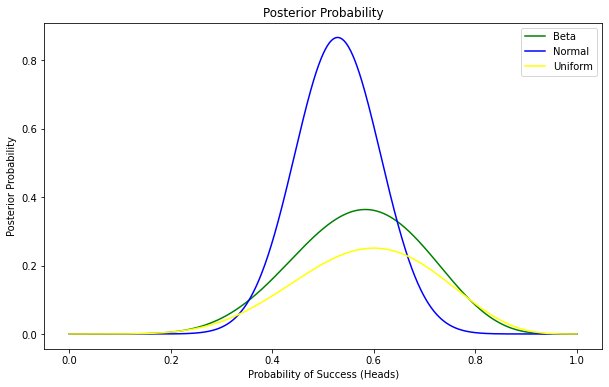

In [102]:
posterior_beta = likelihood*prior_dist_beta
posterior_normal = likelihood*prior_normal_distribution
posterior_uniform = likelihood*prior_uniform

plt.figure(figsize=(10, 6))
plt.plot(probabilities, posterior_beta, label='Beta', color='green')
plt.plot(probabilities, posterior_normal, label='Normal', color='Blue')
plt.plot(probabilities, posterior_uniform, label='Uniform', color='Yellow')
plt.xlabel('Probability of Success (Heads)')
plt.ylabel('Posterior Probability')
plt.title('Posterior Probability')
plt.legend()
plt.show()

## A Better way with PyMC

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_heads]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
The acceptance probability does not match the target. It is 0.8874050022599989, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9060360436789345, but should be close to 0.8. Try to increase the number of tuning steps.


<Figure size 720x432 with 0 Axes>

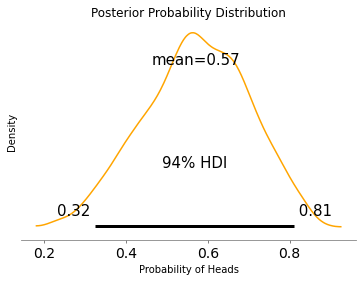

In [103]:
import pymc3 as pm

# Define the PyMC3 model
with pm.Model() as coin_toss_model:
    # Prior - Beta distribution parameters
    prior_alpha = 2
    prior_beta = 2
    p_heads = pm.Beta('p_heads', alpha=prior_alpha, beta=prior_beta)
    
    # Likelihood - Bernoulli distribution based on the observed data
    likelihood = pm.Bernoulli('likelihood', p=p_heads, observed=data)
    
    # Sample from the posterior distribution using MCMC
    trace = pm.sample(1000, tune=1000, return_inferencedata=True)

# Plot the posterior distribution
plt.figure(figsize=(10, 6))
pm.plot_posterior(trace, var_names=['p_heads'], color='orange')
plt.xlabel('Probability of Heads')
plt.ylabel('Density')
plt.title('Posterior Probability Distribution')
plt.show()

          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
p_heads  0.572  0.132   0.324     0.81      0.004    0.003    1404.0   

         ess_tail  r_hat  
p_heads    2090.0    1.0  


<ipython-input-104-71c0e346d28f>:3: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)


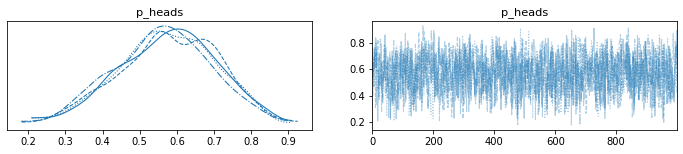

In [104]:
summary = pm.summary(trace)
print(summary)
pm.traceplot(trace)
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_heads]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


<Figure size 720x432 with 0 Axes>

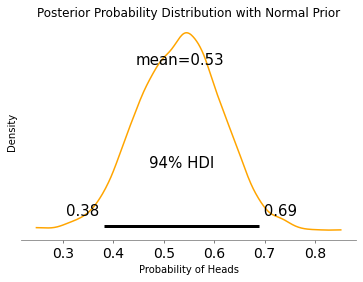

In [105]:
# Define the PyMC3 model
with pm.Model() as coin_toss_model:
    # Prior - Normal distribution parameters
    prior_mu = 0.5   # Mean of the normal distribution
    prior_sigma = 0.1  # Standard deviation of the normal distribution
    
    p_heads = pm.Normal('p_heads', mu=prior_mu, sigma=prior_sigma)
    
    # Likelihood - Bernoulli distribution based on the observed data
    likelihood = pm.Bernoulli('likelihood', p=p_heads, observed=data)
    
    # Sample from the posterior distribution using MCMC
    trace = pm.sample(1000, tune=1000, return_inferencedata=True)

# Plot the posterior distribution
plt.figure(figsize=(10, 6))
pm.plot_posterior(trace, var_names=['p_heads'], color='orange')
plt.xlabel('Probability of Heads')
plt.ylabel('Density')
plt.title('Posterior Probability Distribution with Normal Prior')
plt.show()

          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
p_heads  0.531  0.083   0.382    0.688      0.002    0.001    1738.0   

         ess_tail  r_hat  
p_heads    2912.0    1.0  


<ipython-input-106-71c0e346d28f>:3: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)


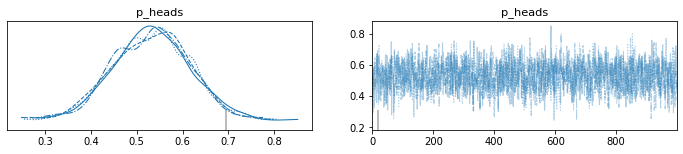

In [106]:
summary = pm.summary(trace)
print(summary)
pm.traceplot(trace)
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, intercept, slope]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8922477915273681, but should be close to 0.8. Try to increase the number of tuning steps.
<ipython-input-92-cd10f9790cac>:24: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)


<Figure size 864x432 with 0 Axes>

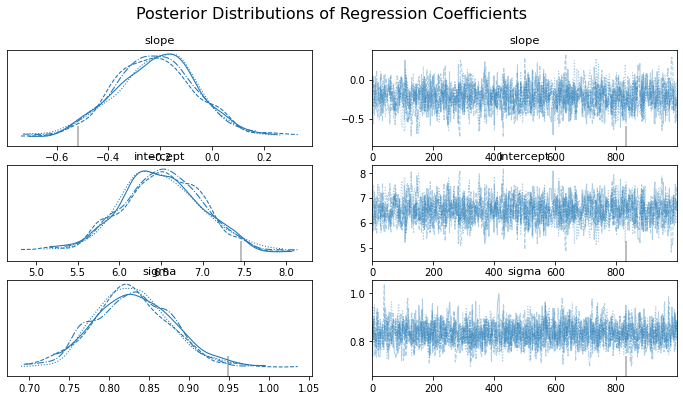

            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
slope     -0.218  0.158  -0.519    0.071      0.005    0.004    1089.0   
intercept  6.509  0.487   5.667    7.463      0.015    0.011    1075.0   
sigma      0.830  0.047   0.746    0.922      0.001    0.001    1557.0   

           ess_tail  r_hat  
slope        1484.0    1.0  
intercept    1510.0    1.0  
sigma        1405.0    1.0  


In [92]:
### Exploritory Data Analysis 
# Load the Iris dataset from seaborn
# Use sepal width to predict sepal length
iris = sns.load_dataset("iris")

# Select the relevant columns from the dataset
data = iris[['sepal_width', 'sepal_length']]

# Define the PyMC3 model
with pm.Model() as linear_regression_model:
    # Priors for the regression coefficients
    slope = pm.Normal('slope', mu=0, sigma=10)
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    
    # Likelihood - linear regression model
    mu = slope * data['sepal_width'] + intercept
    sigma = pm.HalfNormal('sigma', sigma=1) # Errpr term
    likelihood = pm.Normal('sepal_length', mu=mu, sigma=sigma, observed=data['sepal_length'])
    
    # Sample from the posterior distribution using MCMC
    trace = pm.sample(1000, tune=1000, return_inferencedata=True)

# Plot the posterior distributions of the regression coefficients
plt.figure(figsize=(12, 6))
pm.traceplot(trace)
plt.suptitle("Posterior Distributions of Regression Coefficients", fontsize=16)
plt.show()

# Get the summary statistics of the posterior
summary = pm.summary(trace)
print(summary)

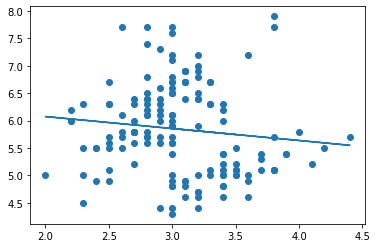

In [93]:
def lm_line(x, slope, intercept):
    return slope*x+intercept

lm = [lm_line(x, slope = -0.218, intercept = 6.509) for x in iris['sepal_width']]

plt.scatter(iris['sepal_width'], iris['sepal_length'])
plt.plot(iris['sepal_width'], lm)